In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report


import warnings
warnings.filterwarnings('ignore')

In [40]:
# Reading the train csv file.

df=pd.read_csv('US_Covid.csv')
df.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-29 04:35:24,32.3182,-86.9023,82366,1491,32510.0,48365.0,1,1679.846875,665399.0,9893.0,1.810213,84000001,USA,13570.750441,12.011024
1,Alaska,US,2020-07-29 04:35:24,61.3707,-152.4044,2730,22,836.0,1872.0,2,373.182784,213875.0,NaN,0.805861,84000002,USA,29236.068868,NaN
2,American Samoa,US,2020-07-29 04:35:24,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,1037.0,NaN,NaN,16,ASM,1863.733578,NaN
3,Arizona,US,2020-07-29 04:35:24,33.7298,-111.4312,165934,3408,21626.0,140900.0,4,2279.714955,890931.0,9394.0,2.053829,84000004,USA,12240.220358,5.661287
4,Arkansas,US,2020-07-29 04:35:24,34.9697,-92.3731,40181,428,33188.0,6565.0,5,1331.464867,489906.0,2686.0,1.065180,84000005,USA,16233.857467,6.684751
5,California,US,2020-07-29 04:35:24,36.1162,-119.6816,470762,8679,NaN,462083.0,6,1191.433851,7417866.0,NaN,1.843607,84000006,USA,18773.598236,NaN
6,Colorado,US,2020-07-29 04:35:24,39.0598,-105.3111,45296,1807,5212.0,38277.0,8,786.561495,500430.0,6271.0,3.989315,84000008,USA,8689.927790,13.844490
7,Connecticut,US,2020-07-29 04:35:24,41.5978,-72.7554,49077,4423,8516.0,36138.0,9,1376.523124,752688.0,10712.0,9.012368,84000009,USA,21111.568297,21.826925
8,Delaware,US,2020-07-29 04:35:24,39.3185,-75.5071,14476,580,8076.0,5820.0,10,1486.602503,174623.0,NaN,4.006632,84000010,USA,17932.784535,NaN
9,Diamond Princess,US,2020-07-29 04:35:24,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [41]:
df.shape

(58, 18)

In [42]:
#df.info()
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,48.000000,58.000000,58.000000,56.000000,5.600000e+01,37.000000,57.000000,5.800000e+01,56.000000,37.000000
mean,36.840089,-85.206614,75034.431034,2573.379310,28236.729167,49092.724138,3288.086207,1055.359097,9.461710e+05,8084.972973,2.971844,7.676194e+07,15123.773297,9.859330
std,10.887035,49.754449,109862.077030,5001.084759,41375.058333,94694.816755,17408.350591,598.620487,1.341252e+06,15139.518190,2.134264,2.378302e+07,5493.510420,4.122719
min,-14.271000,-170.132000,0.000000,0.000000,29.000000,0.000000,1.000000,0.000000,1.037000e+03,4.000000,0.000000,1.600000e+01,1863.733578,3.902185
25%,34.594600,-101.165775,6998.000000,132.250000,3631.750000,1572.750000,18.250000,606.903304,1.771722e+05,1537.000000,1.468048,8.400001e+07,11933.580790,6.308383
50%,39.061850,-87.944200,41554.500000,799.000000,9090.000000,14500.000000,32.500000,952.893649,5.216995e+05,4103.000000,2.053829,8.400003e+07,14525.941056,9.617261
75%,42.361650,-76.970625,86869.750000,3267.500000,36181.500000,43742.500000,47.750000,1452.452162,1.079836e+06,9893.000000,3.989315,8.400004e+07,17515.801807,11.825619
max,61.370700,145.673900,470762.000000,32653.000000,244449.000000,462083.000000,99999.000000,2388.533456,7.417866e+06,89995.000000,9.012368,8.410000e+07,29236.068868,21.826925


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             48 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   37 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

Columns Province_State,Country_Region,Last_Update,ISO3 are of object types and need to be transformed.

In [44]:
# # Encoding columns as part of transformation.

from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

#df = le.fit_transform(df0)
df['Province_State'] = le.fit_transform(df['Province_State'])
df['Country_Region'] = le.fit_transform(df['Country_Region'])
df['Last_Update'] = le.fit_transform(df['Last_Update'])
df['ISO3'] = le.fit_transform(df['ISO3'])

In [45]:
# Checking which all columns have null values

df.isnull().sum().sort_values(ascending=False)
#data.dtypes

Hospitalization_Rate    21
People_Hospitalized     21
Recovered               10
People_Tested            2
Incident_Rate            2
Lat                      2
Testing_Rate             2
Long_                    2
Mortality_Rate           1
Confirmed                0
Country_Region           0
Last_Update              0
Active                   0
Deaths                   0
FIPS                     0
UID                      0
ISO3                     0
Province_State           0
dtype: int64

In [46]:
# Fill the nan or nulls

df['Hospitalization_Rate'].fillna(df['Hospitalization_Rate'].mean(), inplace=True)
df['People_Hospitalized'].fillna(df['People_Hospitalized'].mean(), inplace=True)
df['Recovered'].fillna(df['Recovered'].mean(), inplace=True)
df['People_Tested'].fillna(df['People_Tested'].mean(), inplace=True)
df['Incident_Rate'].fillna(df['Incident_Rate'].mean(), inplace=True)
df['Lat'].fillna(df['Lat'].mean(), inplace=True)

df['Testing_Rate'].fillna(df['Testing_Rate'].mean(), inplace=True)
df['Long_'].fillna(df['Long_'].mean(), inplace=True)
df['Mortality_Rate'].fillna(df['Mortality_Rate'].mean(), inplace=True)

In [47]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,0,32.3182,-86.9023,82366,1491,32510.000000,48365.0,1,1679.846875,665399.0,9893.000000,1.810213,84000001,4,13570.750441,12.011024
1,1,0,0,61.3707,-152.4044,2730,22,836.000000,1872.0,2,373.182784,213875.0,8084.972973,0.805861,84000002,4,29236.068868,9.859330
2,2,0,0,-14.2710,-170.1320,0,0,28236.729167,0.0,60,0.000000,1037.0,8084.972973,2.971844,16,0,1863.733578,9.859330
3,3,0,0,33.7298,-111.4312,165934,3408,21626.000000,140900.0,4,2279.714955,890931.0,9394.000000,2.053829,84000004,4,12240.220358,5.661287
4,4,0,0,34.9697,-92.3731,40181,428,33188.000000,6565.0,5,1331.464867,489906.0,2686.000000,1.065180,84000005,4,16233.857467,6.684751


Columns Country_Region & Last_Update can be dropped as they dont serve any purpose and are single value in the dataset

In [48]:
# Dropping Country_Region & Last_Update.

data=df.drop(['Country_Region', 'Last_Update'],axis=1)
data.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,82366,1491,32510.000000,48365.0,1,1679.846875,665399.0,9893.000000,1.810213,84000001,4,13570.750441,12.011024
1,1,61.3707,-152.4044,2730,22,836.000000,1872.0,2,373.182784,213875.0,8084.972973,0.805861,84000002,4,29236.068868,9.859330
2,2,-14.2710,-170.1320,0,0,28236.729167,0.0,60,0.000000,1037.0,8084.972973,2.971844,16,0,1863.733578,9.859330
3,3,33.7298,-111.4312,165934,3408,21626.000000,140900.0,4,2279.714955,890931.0,9394.000000,2.053829,84000004,4,12240.220358,5.661287
4,4,34.9697,-92.3731,40181,428,33188.000000,6565.0,5,1331.464867,489906.0,2686.000000,1.065180,84000005,4,16233.857467,6.684751


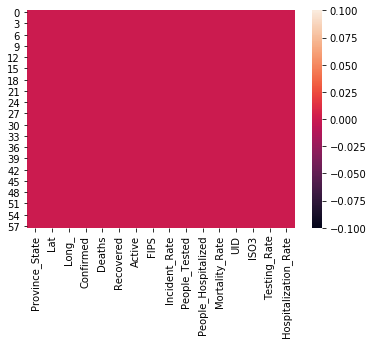

In [49]:
# Checking for null using HeatMap
sns.heatmap(data.isnull())

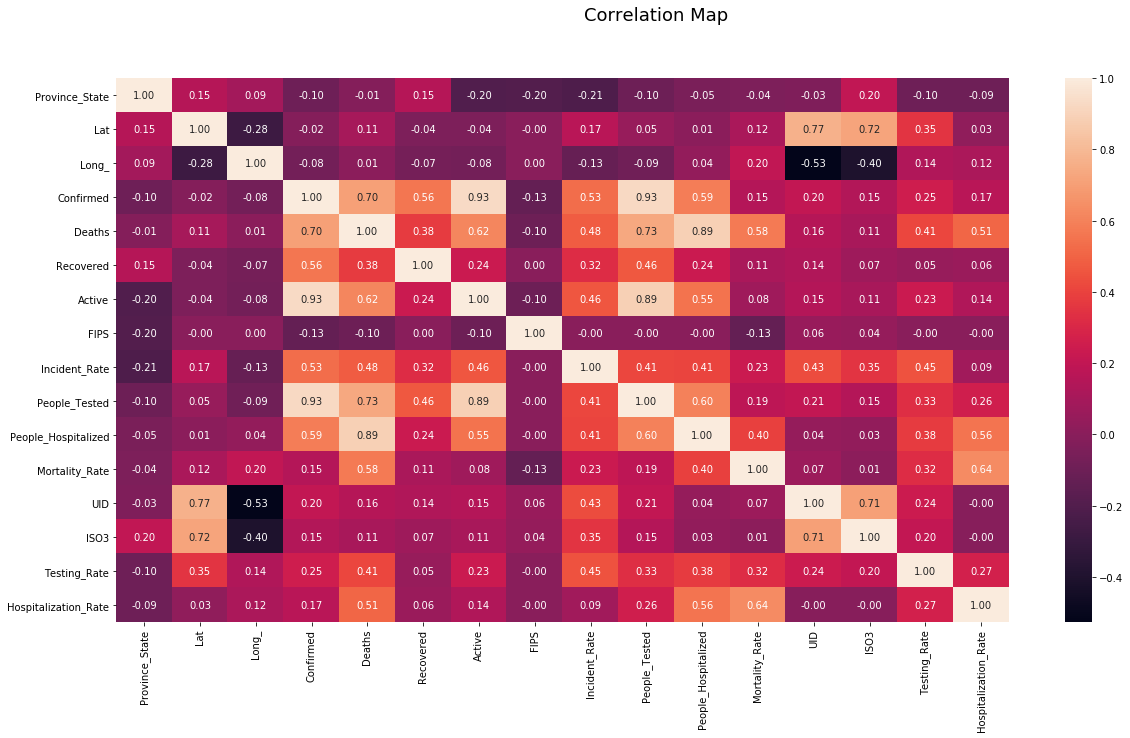

In [50]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [51]:
#sns.pairplot(data)

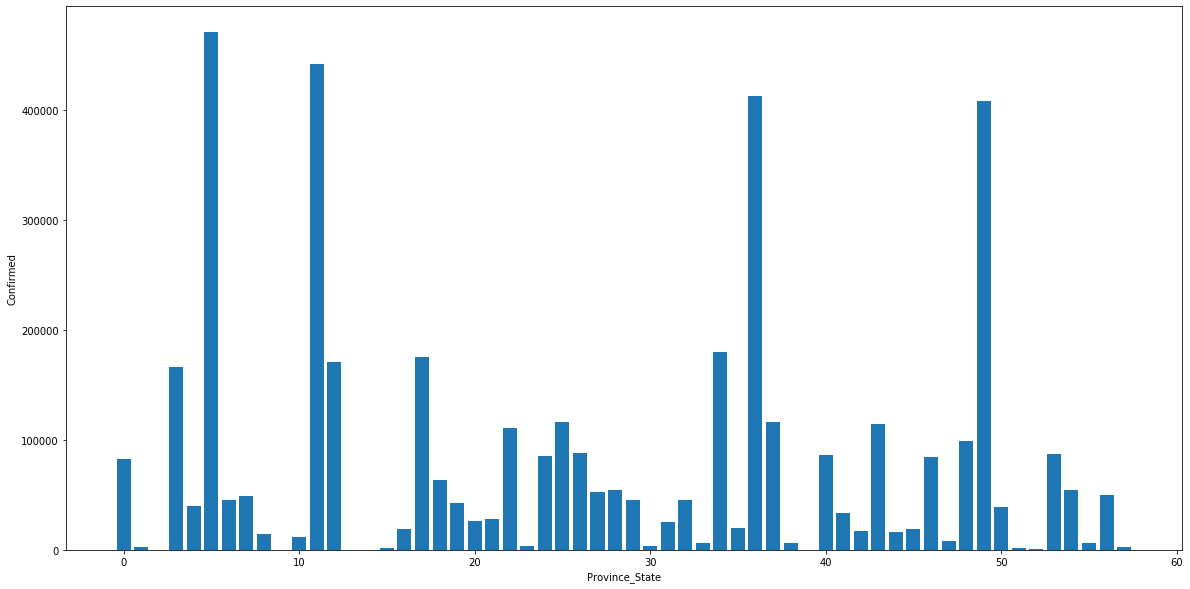

In [52]:
plt.figure(figsize=(20,10))
plt.bar(data['Province_State'], data['Confirmed'])

plt.xlabel('Province_State')
plt.ylabel('Confirmed')
plt.show()

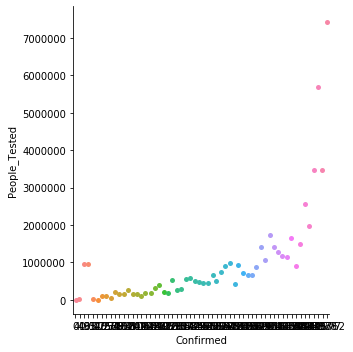

In [53]:
#pd.crosstab(data['Province_State'],data['Confirmed'],margins=True,margins_name='Total')

sns.catplot(x='Confirmed',y='People_Tested',data=data)

In [54]:
# Checking the zscore in order to normalize the data.

from scipy.stats import zscore
z= np.abs(zscore(data))
z

array([[1.70244092e+00, 4.26523477e-01, 3.49982309e-02, 6.73171448e-02,
        2.18319152e-01, 1.14732608e-01, 7.75206028e-03, 1.90471516e-01,
        1.07128499e+00, 2.14969071e-01, 1.51584784e-01, 5.53910962e-01,
        3.06995177e-01, 2.17198770e-01, 2.90309032e-01, 6.62459696e-01],
       [1.64270615e+00, 2.31382962e+00, 1.38693367e+00, 6.63886254e-01,
        5.14620857e-01, 7.35679355e-01, 5.03017395e-01, 1.90413571e-01,
        1.17024747e+00, 5.60671949e-01, 7.62519344e-17, 1.03282537e+00,
        3.06995220e-01, 2.17198770e-01, 2.63803385e+00, 5.46901691e-16],
       [1.58297138e+00, 4.82101134e+00, 1.75282379e+00, 6.88952622e-01,
        5.19058322e-01, 0.00000000e+00, 5.22958821e-01, 1.87052738e-01,
        1.81042832e+00, 7.23628313e-01, 7.62519344e-17, 0.00000000e+00,
        3.25578286e+00, 5.38170286e+00, 2.47872031e+00, 5.46901691e-16],
       [1.52323661e+00, 2.93375472e-01, 5.41264279e-01, 8.34623459e-01,
        1.68345495e-01, 1.77490786e-01, 9.77974345e-01, 1.902

In [55]:
# Verifying for the presence of zscore value of data with threshold of more than 3 std score.

threshold=3
print(np.where(z>3))

(array([ 2,  2,  2,  5,  5,  5,  7,  9, 11, 11, 13, 14, 14, 14, 36, 36, 36,
       36, 36, 39, 39, 44, 49, 49, 52], dtype=int64), array([ 1, 12, 13,  3,  6,  9, 15,  7,  3,  6,  7,  2, 12, 13,  3,  4,  9,
       10, 15,  2, 12, 12,  3,  5, 12], dtype=int64))


In [56]:
# Removing the outliers having zscore value of more than 3.
covidDS=data[(z<3).all(axis=1)]
covidDS

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,82366,1491,32510.000000,48365.0,1,1679.846875,665399.0,9893.000000,1.810213,84000001,4,13570.750441,12.011024
1,1,61.3707,-152.4044,2730,22,836.000000,1872.0,2,373.182784,213875.0,8084.972973,0.805861,84000002,4,29236.068868,9.859330
3,3,33.7298,-111.4312,165934,3408,21626.000000,140900.0,4,2279.714955,890931.0,9394.000000,2.053829,84000004,4,12240.220358,5.661287
4,4,34.9697,-92.3731,40181,428,33188.000000,6565.0,5,1331.464867,489906.0,2686.000000,1.065180,84000005,4,16233.857467,6.684751
6,6,39.0598,-105.3111,45296,1807,5212.000000,38277.0,8,786.561495,500430.0,6271.000000,3.989315,84000008,4,8689.927790,13.844490
8,8,39.3185,-75.5071,14476,580,8076.000000,5820.0,10,1486.602503,174623.0,8084.972973,4.006632,84000010,4,17932.784535,9.859330
10,10,38.8974,-77.0268,11945,583,9664.000000,1698.0,11,1692.528080,178022.0,8084.972973,4.880703,84000011,4,25224.548671,9.859330
12,12,33.0406,-83.6431,170843,3509,28236.729167,167334.0,13,1609.081601,1487326.0,17544.000000,2.053933,84000013,4,14008.352121,10.269077
15,15,21.0943,-157.4983,1757,26,1191.000000,540.0,15,124.093138,114143.0,165.000000,1.479795,84000015,4,8061.675067,9.391007
16,16,44.2405,-114.4788,19220,160,5964.000000,13096.0,16,1075.506487,170717.0,750.000000,0.832466,84000016,4,9552.926167,3.902185


In [57]:
covidDS.skew()

Province_State         -0.072206
Lat                     0.299564
Long_                  -1.419347
Confirmed               1.032132
Deaths                  2.896542
Recovered               1.254639
Active                  2.147038
FIPS                   -0.062478
Incident_Rate           0.340375
People_Tested           1.239048
People_Hospitalized     0.955040
Mortality_Rate          1.241712
UID                    -0.062478
ISO3                    0.000000
Testing_Rate            1.062787
Hospitalization_Rate   -0.139061
dtype: float64

In [58]:
# Setting x  by excluding AveragePrice column which is y here for prediction.
x=covidDS.drop(['Confirmed'],axis=1)
x

,Province_State,Lat,Long_,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,1491,32510.000000,48365.0,1,1679.846875,665399.0,9893.000000,1.810213,84000001,4,13570.750441,12.011024
1,1,61.3707,-152.4044,22,836.000000,1872.0,2,373.182784,213875.0,8084.972973,0.805861,84000002,4,29236.068868,9.859330
3,3,33.7298,-111.4312,3408,21626.000000,140900.0,4,2279.714955,890931.0,9394.000000,2.053829,84000004,4,12240.220358,5.661287
4,4,34.9697,-92.3731,428,33188.000000,6565.0,5,1331.464867,489906.0,2686.000000,1.065180,84000005,4,16233.857467,6.684751
6,6,39.0598,-105.3111,1807,5212.000000,38277.0,8,786.561495,500430.0,6271.000000,3.989315,84000008,4,8689.927790,13.844490
8,8,39.3185,-75.5071,580,8076.000000,5820.0,10,1486.602503,174623.0,8084.972973,4.006632,84000010,4,17932.784535,9.859330
10,10,38.8974,-77.0268,583,9664.000000,1698.0,11,1692.528080,178022.0,8084.972973,4.880703,84000011,4,25224.548671,9.859330
12,12,33.0406,-83.6431,3509,28236.729167,167334.0,13,1609.081601,1487326.0,17544.000000,2.053933,84000013,4,14008.352121,10.269077
15,15,21.0943,-157.4983,26,1191.000000,540.0,15,124.093138,114143.0,165.000000,1.479795,84000015,4,8061.675067,9.391007
16,16,44.2405,-114.4788,160,5964.000000,13096.0,16,1075.506487,170717.0,750.000000,0.832466,84000016,4,9552.926167,3.902185


In [59]:
# Settng Y

y=covidDS['Confirmed']

In [60]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  98  is  0.9885403773416201


In [61]:
train_x.shape

(34, 15)

In [62]:
train_y.shape

(34,)

In [63]:
test_x.shape

(12, 15)

In [64]:
test_y.shape

(12,)

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
KNN=KNeighborsRegressor(n_neighbors=10)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=10)
LS = Lasso(alpha=0.001)
RD = Ridge(alpha=0.01)
EL = ElasticNet(alpha=0.001)
RF = RandomForestRegressor(n_estimators=200,random_state=10)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [67]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [68]:
Model=[]
score=[]
cvs=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
Mean absolute error 6162.6255289713545
Mean squared error 63841481.707557894
Root Mean absolute error 7990.086464335533
Score:  0.7157386513908337


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 6162.6255289713545
Mean squared error 63841481.707557894
Root Mean absolute error 7990.086464335533
Score:  -0.30088445617343923


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 6162.6255289713545
Mean squared error 63841481.707557894
Root Mean absolute error 7990.086464335533
Score:  0.9745397904973756


------

In [69]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,71.573865
1,SVR,-30.088446
2,LinearRegression,97.453979
3,DecisionTreeRegressor,73.741853
4,Lasso,97.403647
5,Ridge,97.454020
6,ElasticNet,97.403831
7,RandomForestRegressor,78.127285
8,AdaBoostRegressor,89.072875
9,GradientBoostingRegressor,78.596028


# From the above table Lasso, Ridge,ElasticNet Regressor seems to be the models with over 97% accuracy.

Selecting the best model using GridSearchCV check

In [70]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

   
rd= GridSearchCV(Ridge(),param_grid=params)
rd.fit(train_x,train_y)
print("Best parameters for Ridge: ",rd.best_params_)

la=GridSearchCV(Lasso(),param_grid=params)
la.fit(train_x,train_y)
print("Best parameters for Lasso: ",la.best_params_)

el=GridSearchCV(ElasticNet(),param_grid=params)
el.fit(train_x,train_y)
print("Best parameters for ElasticNet: ",el.best_params_)

Best parameters for Ridge:  {'alpha': 0.03}
Best parameters for Lasso:  {'alpha': 0.03}
Best parameters for ElasticNet:  {'alpha': 0.03}


In [71]:
LS = Lasso(alpha=0.03)
RD = Ridge(alpha=0.03)
EL = ElasticNet(alpha=0.03)

In [72]:
models=[]
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))

In [73]:
Model=[]
score=[]
cvs=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
        
    print("\n")

-------------- Lasso --------------
Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Mean absolute error 6162.6255289713545
Mean squared error 63841481.707557894
Root Mean absolute error 7990.086464335533
Score:  0.9740369383772326


-------------- Ridge --------------
Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Mean absolute error 6162.6255289713545
Mean squared error 63841481.707557894
Root Mean absolute error 7990.086464335533
Score:  0.9745410153628691


-------------- ElasticNet --------------
ElasticNet(alpha=0.03, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Mean absolute error 6162.62552

In [74]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,Lasso,97.403694
1,Ridge,97.454102
2,ElasticNet,97.409168


# Ridge Regressor is the best fit model having better accuracy with 97.45%

In [75]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
data.to_csv('CovidConfirmed_Predict.csv')
predictData

,0
0,17450.603625
1,79103.475812
2,50239.096054
3,90778.814087
4,73488.014411
5,3907.617449
6,19691.685938
7,106922.592086
8,179350.526999
9,16102.376773


In [76]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(RD,"RD_CovidConfirmed.pkl")

['RD_CovidConfirmed.pkl']